<a href="https://colab.research.google.com/github/prateeksrivastava07/NN-and-CNN/blob/main/FacemaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
import pandas as pd

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prateeksrivastava","key":"2f24edd30b13fbea1a391325ed51d9a3"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 98% 217M/222M [00:07<00:00, 34.3MB/s]
100% 222M/222M [00:07<00:00, 32.2MB/s]


In [7]:
!unzip '/content/face-mask-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
data_gen=ImageDataGenerator(
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True,
fill_mode='nearest',
validation_split=0.2)

In [10]:
train_data=data_gen.flow_from_directory('/content/Dataset',
target_size=(150,150),
batch_size=50,
subset='training') #train_data is 80 % of (2994 * 3 =total given images in of all three classes)


Found 7188 images belonging to 3 classes.


In [11]:
val_data=data_gen.flow_from_directory('/content/Dataset',
target_size=(150,150),
batch_size=50,
subset='validation')#val_data is 20 % of (2994 * 3 =total given images in of all three classes)

Found 1794 images belonging to 3 classes.


In [12]:
train_data.class_indices

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}

In [13]:
val_data.class_indices

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}

In [35]:
img,label=next(train_data)
#img[0].shape

(150, 150, 3)

[0. 0. 1.]


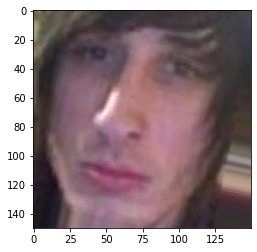

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img[10])
print(label[10])

In [16]:
import tensorflow as tf
from keras import backend as k

In [39]:
if k.image_data_format()=='channel_first':
  our_input_shape=(3,150,150) # first 150 is width of input image and second 150 is height. here we have decided the width and height
else:
  our_input_shape=(150,150,3)

In [98]:
model=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=our_input_shape),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(3,activation='softmax')                        
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [99]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [100]:
model.fit(train_data,
steps_per_epoch=140,
validation_data=val_data,   # total number of batches ie usually ceiling(total samples/samples in one batch, or you can say number of iterations in one epoch)
validation_steps=35,
epochs=5,shuffle=True)

Epoch 1/5
140/140 [==============================] - 59s 416ms/step - loss: 0.7263 - accuracy: 0.6965 - val_loss: 0.5846 - val_accuracy: 0.7691
Epoch 2/5
140/140 [==============================] - 57s 410ms/step - loss: 0.5312 - accuracy: 0.7869 - val_loss: 0.4875 - val_accuracy: 0.8034
Epoch 3/5
140/140 [==============================] - 57s 408ms/step - loss: 0.4819 - accuracy: 0.8102 - val_loss: 0.4676 - val_accuracy: 0.8040
Epoch 4/5
140/140 [==============================] - 57s 406ms/step - loss: 0.4506 - accuracy: 0.8237 - val_loss: 0.3934 - val_accuracy: 0.8354
Epoch 5/5
140/140 [==============================] - 56s 402ms/step - loss: 0.4309 - accuracy: 0.8276 - val_loss: 0.3545 - val_accuracy: 0.8537


In [102]:
model.save('model.h5')

In [103]:
from keras.preprocessing import image


In [122]:
#img=image.load_img('/content/Dataset/with_mask/1.png',target_size=(150,150))
img=image.load_img('/content/Dataset/without_mask/1001.png',target_size=(150,150))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)


In [123]:
img.shape

(1, 150, 150, 3)

In [124]:
result=model.predict(img)

In [125]:
result

array([[0., 0., 1.]], dtype=float32)

In [126]:
import numpy as np


In [127]:
index=np.argmax(result)

In [128]:
index

2

In [129]:
if index==0:
  prediction='Mask Weared Incorrectly'
if index==1:
  prediction='Mask Weared correctly'
if index==2:
  prediction='Mask not Weared'
print(prediction)

Mask not Weared
